<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principle Component Analysis

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/train (1).csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
#checking for null values
data.isnull().sum().sort_values(ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [4]:
num = data.select_dtypes(include= 'number')
cat = data.select_dtypes(exclude= 'number')

print('Numerical Data')
display(num.head())
print('\nCategorical Data')
display(cat.head())

Numerical Data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000



Categorical Data


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
#we fill the once that are < 30 and drop the once > 30
for i in data.columns:
  if data[i].dtypes =='O':
    if (data[i].isnull().sum() / len(data)) * 100 > 0.3:
      data.drop(i, axis = 1, inplace=True)
    else:
      data[i].fillna(data[i].mode()[0], inplace=True)
  else:
    if (data[i].isnull().sum() / len(data)) * 100 > 0.3:
      data.drop(i, axis = 1, inplace=True)
    else:
      data[i].fillna(data[i].median(), inplace=True)
data.isnull().sum().sort_values(ascending=False).head(20)

,0
Id,0
Fireplaces,0
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0
GrLivArea,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0


In [23]:
#endoding all categorical data
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

df =data.copy()
#droping the Id because its not needed and SalesPrice because its the Y value we want to predict
df.drop(['Id', 'SalePrice'], axis = 1)

#encode the categorical
for i in df.select_dtypes(exclude='number'):
  df[i] = encoder.fit_transform(df[i])

#we scale the entire dataframe
for i in df.columns:
  df[i] = scaler.fit_transform(df[[i]])

df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.207142,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,-0.091886,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.073480,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.096897,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.375148,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


In [9]:
from sklearn.decomposition import PCA
#choose the number of columns to be components or we can choose the percrntage of information to retain
pca = PCA(n_components= 40)
#fit the PCA algorithm on the data set
pca.fit(df)
#transform the data
x_pca = pca.transform(df)

#turn the dataset to a dataframe for easy visualization
display(pd.DataFrame(x_pca).head())
print('x_pca:', x_pca.shape)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.842536,0.597053,-2.156216,-0.494994,-1.182057,1.345405,0.359067,1.512964,-0.475985,0.259896,...,-1.636497,0.278445,0.440259,-0.188380,0.317277,-0.003634,-0.346624,-0.292789,-0.343459,-0.077758
1,-0.186344,-1.166151,1.174871,-0.527517,-1.036210,-1.574271,0.832444,-0.735459,0.397058,-0.406870,...,1.166926,0.077012,-0.246463,-0.891799,0.607351,-0.941113,-0.220353,-1.146657,0.255693,-0.236666
2,2.299925,0.393668,-1.732654,-0.357023,-1.525416,1.062992,-0.417339,0.660420,-0.334452,0.132659,...,-0.618339,0.766931,0.351879,0.074082,-0.448493,0.448289,-0.308731,0.744877,-0.936639,0.016354
3,-0.847040,1.543012,1.159820,0.284483,-1.448157,0.587072,0.153695,1.824151,-0.875056,-2.343968,...,-0.588283,0.828633,-1.997580,-1.373340,0.480494,0.817675,0.489537,0.848073,-0.860240,-1.412072
4,4.601340,1.554304,-0.542481,-0.628354,-1.265035,0.465901,-0.499651,1.254314,-0.543187,0.144089,...,0.061910,0.705917,0.268899,-0.344103,0.308870,0.564021,-0.186174,0.373796,-0.143677,0.383718


x_pca: (1460, 40)


In [11]:
#to find out how much information of the original dataset this dimensionality reduction covers
cummulative_variance = pca.explained_variance_ratio_
display(cummulative_variance)

#show the total variance explained by the newly created feature
print(f'sum of information captured: {sum([i for i in cummulative_variance])}')

array([0.14408935, 0.05568993, 0.05066363, 0.04138452, 0.03478495,
       0.02974553, 0.02633177, 0.02344978, 0.02318656, 0.02246325,
       0.02037961, 0.01967905, 0.01933144, 0.01923093, 0.01806063,
       0.01774938, 0.0176602 , 0.01736344, 0.0169943 , 0.01685669,
       0.01596056, 0.01568259, 0.01554719, 0.01530382, 0.014947  ,
       0.01446235, 0.01381817, 0.01371835, 0.01335818, 0.01308429,
       0.01273518, 0.01246298, 0.01187277, 0.01177005, 0.01165874,
       0.01121382, 0.0107854 , 0.01010204, 0.00982533, 0.00958171])

sum of information captured: 0.8929854358388705


Text(0.5, 1.0, 'Histogram Scree Plot')

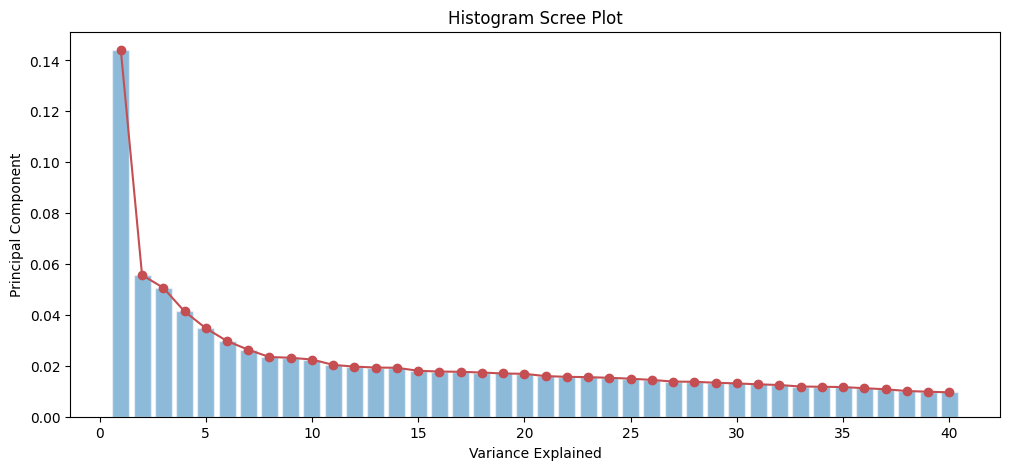

In [12]:
#we can use a histogram to see how much information each column gathered

fig, ax = plt.subplots(figsize = (12, 5))
sns.set(style = 'darkgrid')
ax.bar(range(1, 41), pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
ax.plot(range(1, 41), cummulative_variance, 'o-', color = 'r')

plt.ylabel('Principal Component')
plt.xlabel('Variance Explained')
plt.title('Histogram Scree Plot')

In [13]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
x = df.drop('SalePrice', axis = 1)
y = df.SalePrice

xtrain, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 40)
print(f'xtrain shape: {xtrain.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

xtrain shape: (1168, 62)
x_test shape: (292, 62)
y_train shape: (1168,)
y_test shape: (292,)


In [26]:
#THE MODEL
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(xtrain, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
#PREDICTION
from sklearn.metrics import mean_squared_error, r2_score

prediction = model.predict(xtrain)
print(r2_score(y_train, prediction)* 100)

99.97624912045703


In [28]:
prediction = model.predict(x_test)
print(r2_score(y_test, prediction)* 100)

86.32640271475279
